## Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import math

In [27]:
from pandas_summary import DataFrameSummary
from sklearn.decomposition import PCA

In [4]:
path = Path('./data/')

In [5]:
!ls {path}

sample_submission.csv test_transaction.csv  train_transaction.csv
test_identity.csv     train_identity.csv


In [6]:
train_trans = pd.read_csv(path/'train_transaction.csv')
train_ids = pd.read_csv(path/'train_identity.csv')
test_trans = pd.read_csv(path/'test_transaction.csv')
test_ids = pd.read_csv(path/'test_identity.csv')

In [7]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

## Analysis

In [8]:
train_trans.shape, train_ids.shape

((590540, 394), (144233, 41))

In [9]:
test_trans.shape, test_ids.shape

((506691, 393), (141907, 41))

In [12]:
train_trans.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2

In [13]:
train_ids.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,0.0,100.0,NotFound,52.0,-300.0,Found,Found,166.0,18.0,529.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,484.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


### IsFraud

In [17]:
train_trans.isFraud.value_counts()/len(train_trans)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

### TransactionDT

In [24]:
train_trans['Day'] = train_trans.TransactionDT.map(lambda v: int(v/86400))
train_trans['Hour'] = train_trans.TransactionDT.map(lambda v: int((v%86400)/3600))

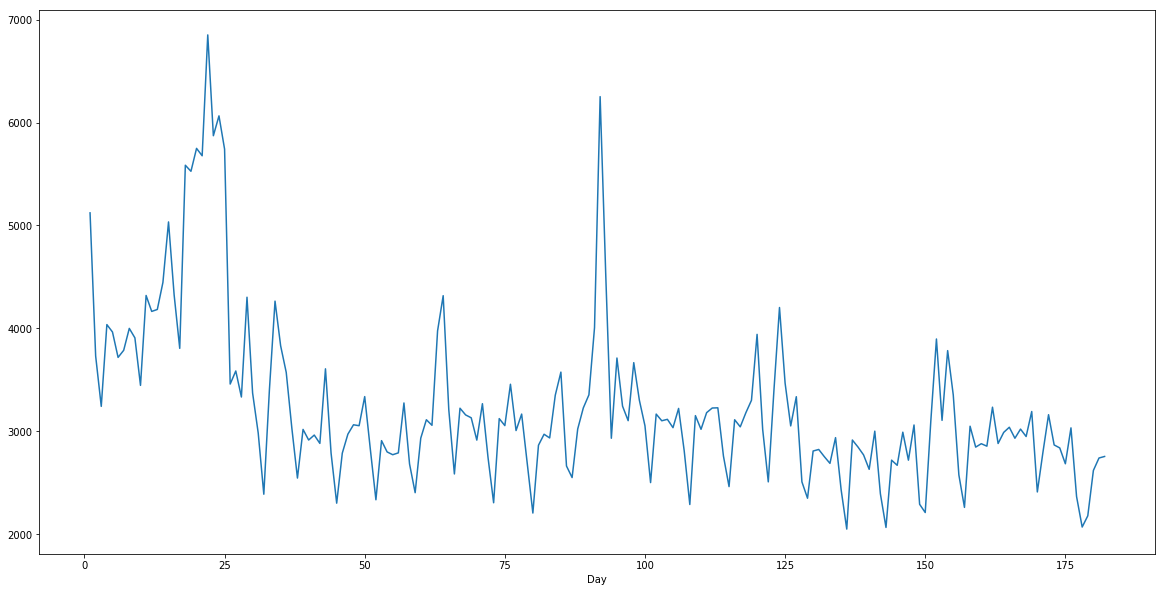

In [36]:
train_trans.groupby('Day').size().plot(figsize=(20,10))

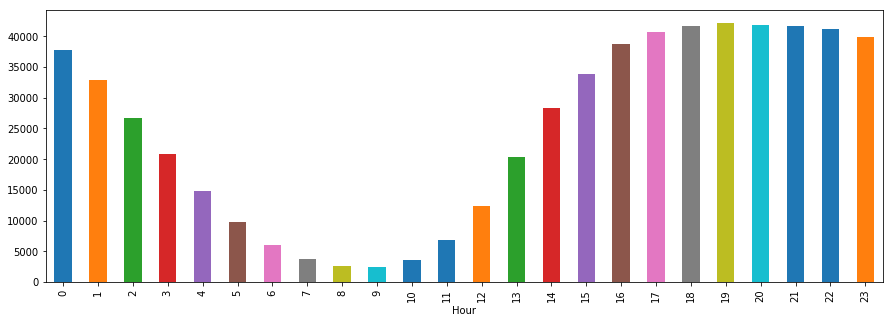

In [40]:
train_trans.groupby('Hour').size().plot(kind='bar',figsize=(15,5))

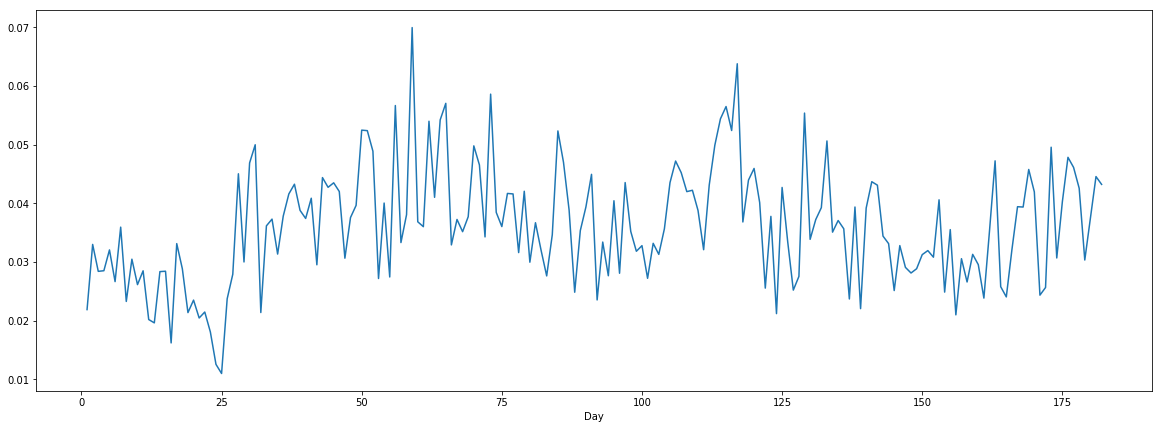

In [43]:
train_trans.groupby('Day')['isFraud'].mean().plot(figsize=(20,7))

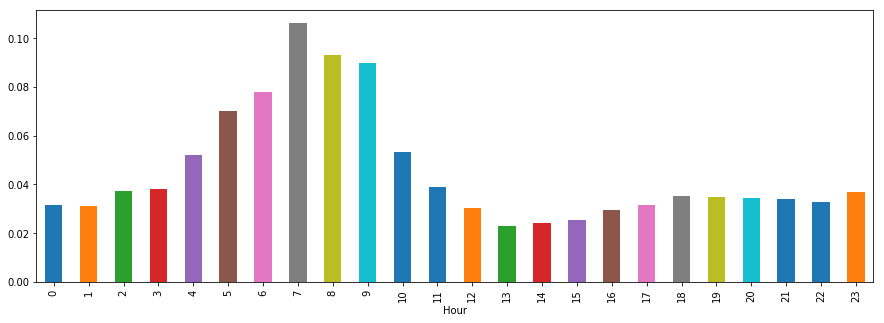

In [44]:
train_trans.groupby('Hour')['isFraud'].mean().plot(kind='bar',figsize=(15,5))

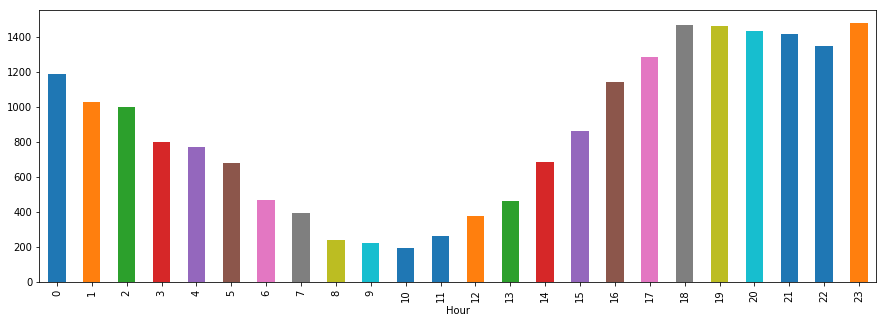

In [45]:
train_trans.groupby('Hour')['isFraud'].sum().plot(kind='bar',figsize=(15,5))

### TransactionAmt

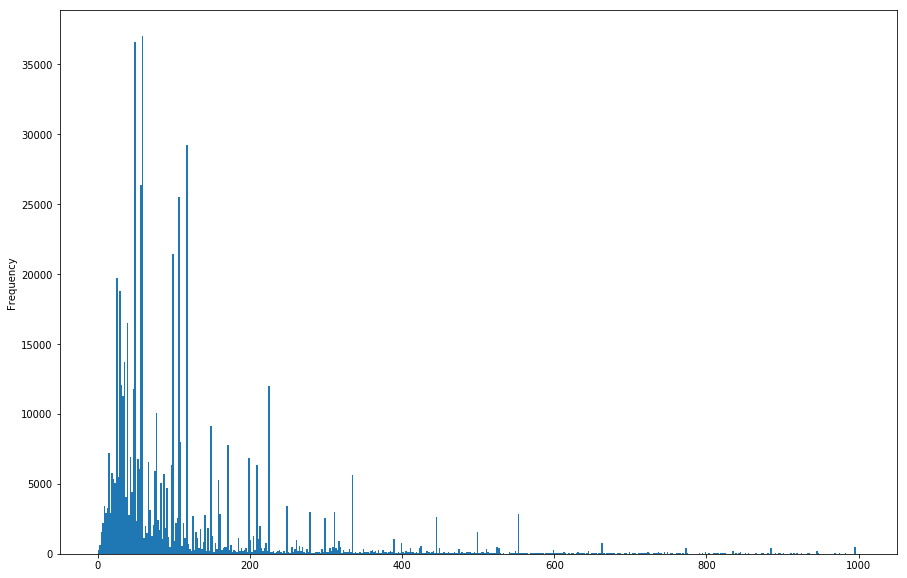

In [54]:
train_trans.TransactionAmt[train_trans.TransactionAmt<1000].plot(kind='hist', figsize=(15,10), bins=500)

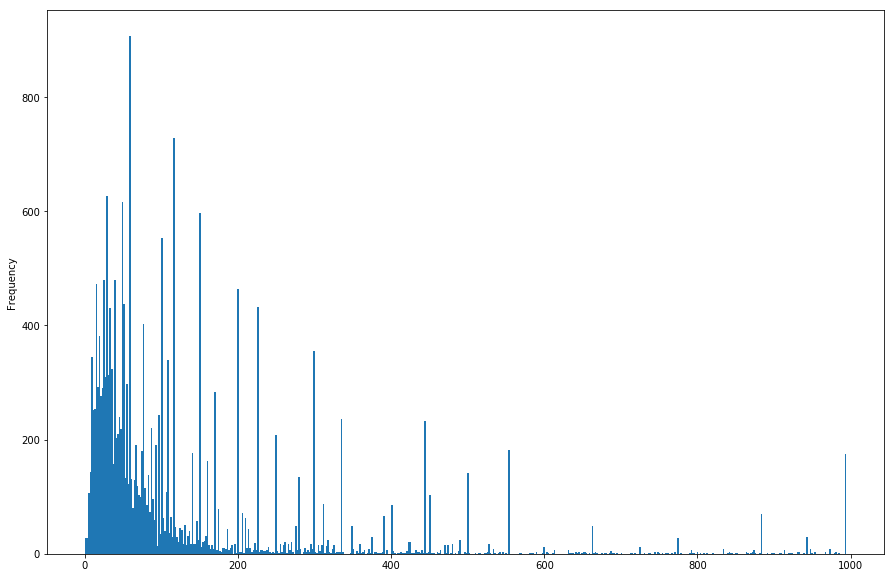

In [55]:
train_trans.TransactionAmt[(train_trans.TransactionAmt<1000) & (train_trans.isFraud == 1)].plot(kind='hist', figsize=(15,10), bins=500)

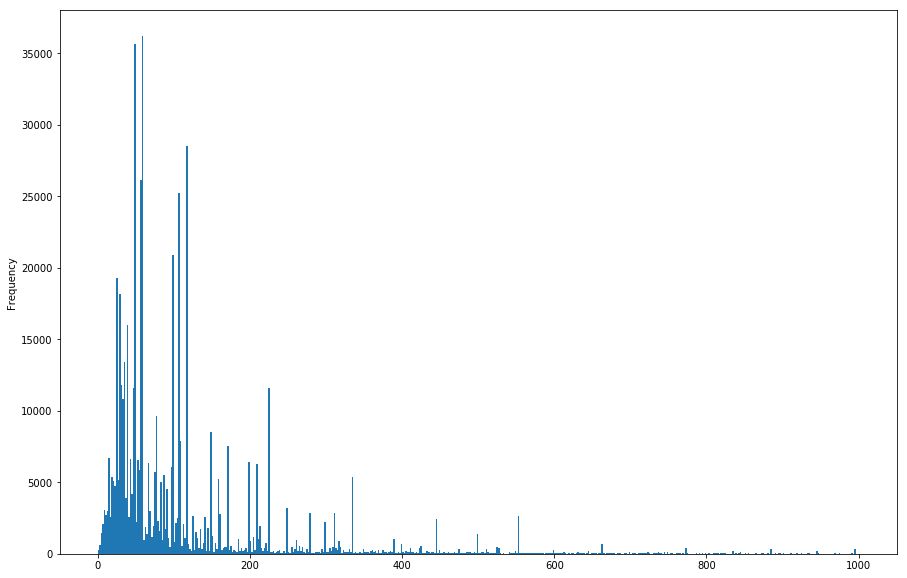

In [56]:
train_trans.TransactionAmt[(train_trans.TransactionAmt<1000) & (train_trans.isFraud == 0)].plot(kind='hist', figsize=(15,10), bins=500)

### ProductCD

In [57]:
train_trans.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [58]:
train_trans.groupby('ProductCD')['isFraud'].mean()

ProductCD
C    0.116873
H    0.047662
R    0.037826
S    0.058996
W    0.020399
Name: isFraud, dtype: float64

## Card Features

### Card1

In [7]:
train_trans.card1.nunique(), train_trans.card1.min(), train_trans.card1.max()

(13553, 1000, 18396)

In [15]:
df = train_trans.groupby('card1')['isFraud'].agg(['sum', 'mean'])

In [19]:
df.sort_values('sum', ascending=False)

,sum,mean
card1,,
9633,742,0.178451
9500,528,0.037283
15885,444,0.042853
9026,397,0.191233
15063,319,0.126487
2616,314,0.071202
5812,314,0.111427
15066,313,0.039396
9917,306,0.332971


### Card2

In [22]:
train_trans.card2.isnull().sum()/len(train_trans)

0.015126833068039422

In [23]:
train_trans.card2.describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

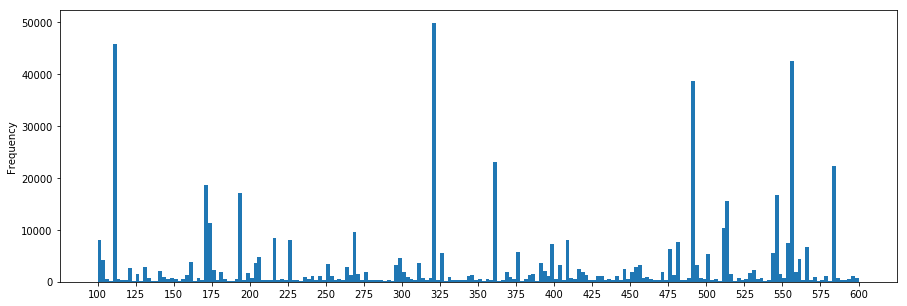

In [29]:
train_trans.card2.plot(kind='hist', bins=200, figsize=(15,5), xticks=range(100,601,25))

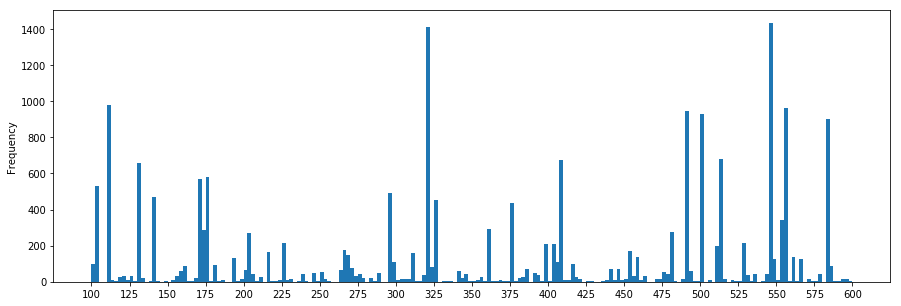

In [30]:
train_trans.card2[train_trans.isFraud==1].plot(kind='hist', bins=200, figsize=(15,5), xticks=range(100,601,25))

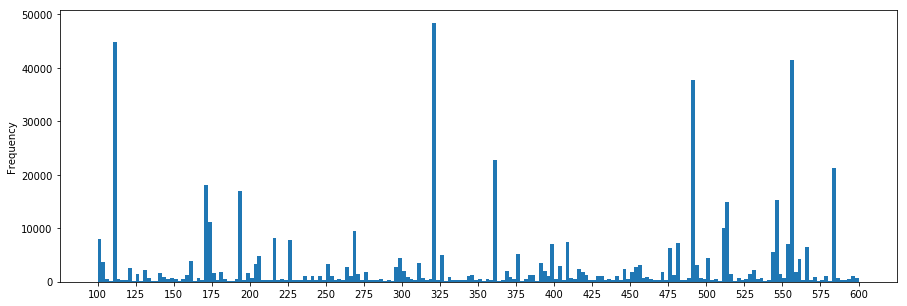

In [31]:
train_trans.card2[train_trans.isFraud==0].plot(kind='hist', bins=200, figsize=(15,5), xticks=range(100,601,25))

### Card3

In [32]:
train_trans.card3.describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

In [51]:
sum(train_trans.card3 > 150)/len(train_trans)

0.09946489653537441

### Card4

In [53]:
train_trans.card4.describe()

count     588963
unique         4
top         visa
freq      384767
Name: card4, dtype: object

In [54]:
train_trans.card4.value_counts()/len(train_trans)

visa                0.651551
mastercard          0.320414
american express    0.014102
discover            0.011263
Name: card4, dtype: float64

In [56]:
train_trans.groupby('card4')['isFraud'].agg(['mean', 'sum', 'size'])

,mean,sum,size
card4,,,
american express,0.028698,239,8328
discover,0.077282,514,6651
mastercard,0.034331,6496,189217
visa,0.034756,13373,384767


### Card5

In [57]:
train_trans.card5.describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

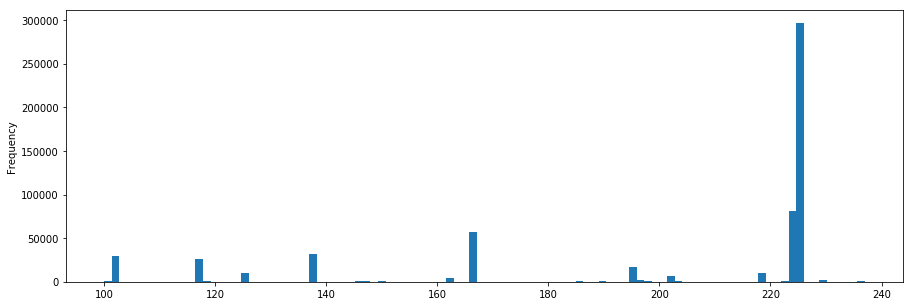

In [62]:
train_trans.card5.plot(kind='hist', bins=100, figsize=(15,5))

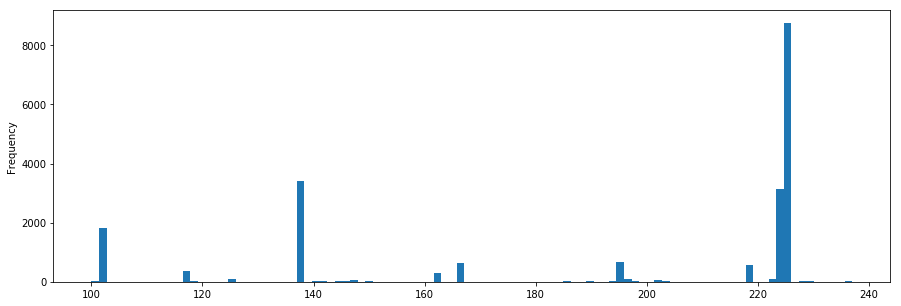

In [63]:
train_trans.card5[train_trans.isFraud==1].plot(kind='hist', bins=100, figsize=(15,5))

### Card6

In [64]:
train_trans.card6.describe()

count     588969
unique         4
top        debit
freq      439938
Name: card6, dtype: object

In [65]:
train_trans.card6.value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [66]:
train_trans.groupby('card6')['isFraud'].agg(['sum', 'mean', 'size'])

,sum,mean,size
card6,,,
charge card,0,0.000000,15
credit,9950,0.066785,148986
debit,10674,0.024263,439938
debit or credit,0,0.000000,30


## Address Features

### Addr1

In [67]:
train_trans.addr1.describe()

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

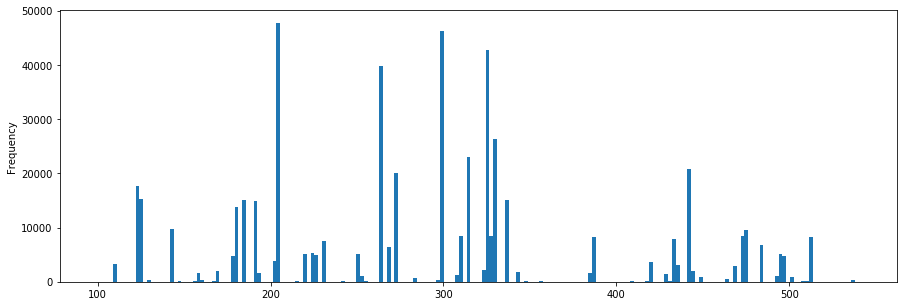

In [69]:
train_trans.addr1.plot(kind='hist', figsize=(15,5), bins=200)

### Addr2

In [70]:
train_trans.addr2.describe()

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

In [71]:
train_trans[train_trans.isFraud==1].addr2.describe()

count    12922.000000
mean        86.286024
std          4.936238
min         10.000000
25%         87.000000
50%         87.000000
75%         87.000000
max         96.000000
Name: addr2, dtype: float64

## Distance Features

### Dist1

In [72]:
train_trans.dist1.describe()

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

In [77]:
sum(train_trans.dist1 > 120)/train_trans.dist1.notnull().sum()

0.13125501009363366

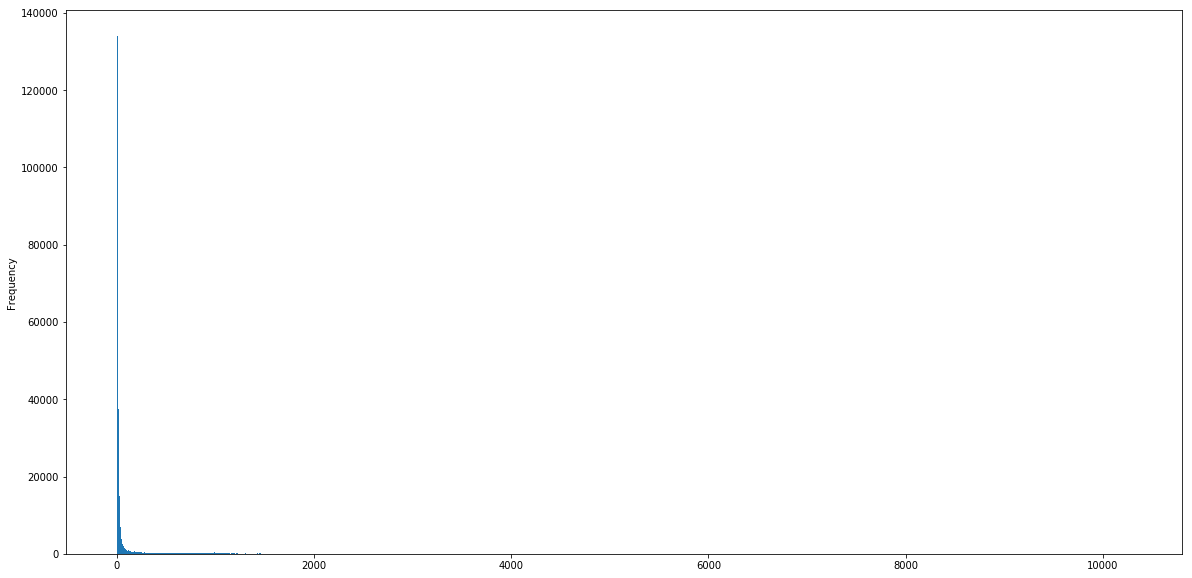

In [81]:
train_trans.dist1.plot(kind='hist', bins=1000, figsize=(20,10))

In [82]:
train_trans.dist1.isnull().sum()/len(train_trans)

0.596523520845328

### Dist2

In [83]:
train_trans.dist2.isnull().sum()/len(train_trans)

0.9362837403054831

In [84]:
train_trans.dist2.describe()

count    37627.000000
mean       231.855423
std        529.053494
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64

## Email Features

### P_emaildomain

In [86]:
train_trans.P_emaildomain.describe()

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

In [87]:
train_trans.P_emaildomain.isnull().mean()

0.1599485216920107

In [89]:
train_trans.groupby('P_emaildomain')['isFraud'].agg(['mean', 'sum', 'size']).sort_values('size', ascending=False)

,mean,sum,size
P_emaildomain,,,
gmail.com,0.043542,9943,228355
yahoo.com,0.022757,2297,100934
hotmail.com,0.052950,2396,45250
anonymous.com,0.023217,859,36998
aol.com,0.021811,617,28289
comcast.net,0.031187,246,7888
icloud.com,0.031434,197,6267
outlook.com,0.094584,482,5096
msn.com,0.021994,90,4092


### R_emaildomain

In [90]:
train_trans.R_emaildomain.describe()

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [91]:
train_trans.R_emaildomain.isnull().mean()

0.7675161716395164

In [92]:
train_trans.groupby('R_emaildomain')['isFraud'].agg(['mean', 'sum', 'size']).sort_values('size', ascending=False)

,mean,sum,size
R_emaildomain,,,
gmail.com,0.119184,6811,57147
hotmail.com,0.077793,2140,27509
anonymous.com,0.029130,598,20529
yahoo.com,0.051512,610,11842
aol.com,0.034855,129,3701
outlook.com,0.165138,414,2507
comcast.net,0.011589,21,1812
yahoo.com.mx,0.010610,16,1508
icloud.com,0.128755,180,1398


## C Features

In [8]:
cols = list(train_trans.columns)[17:31]

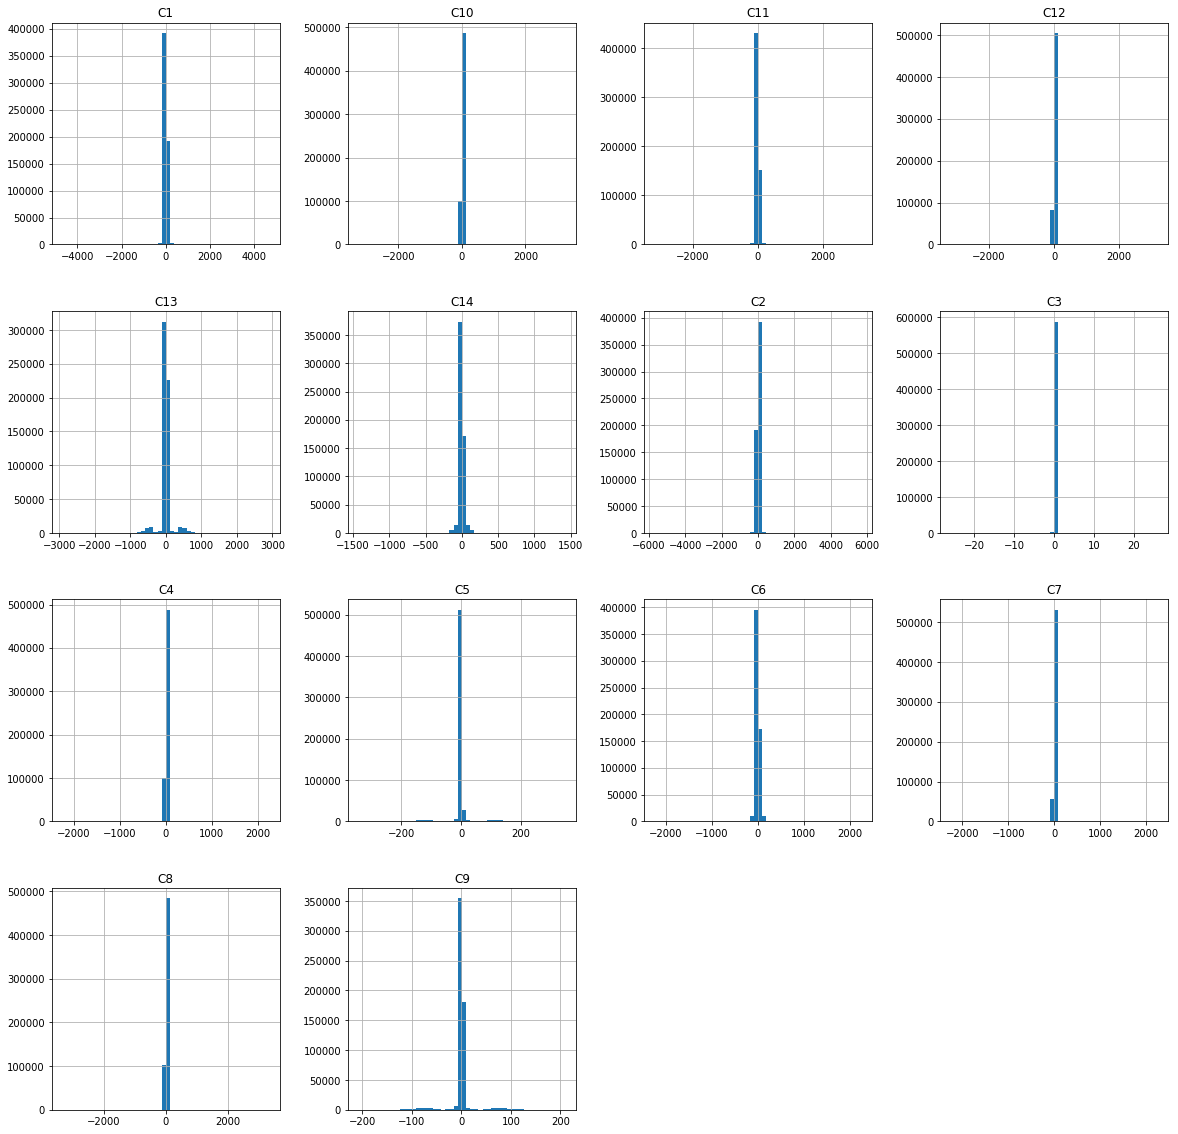

In [103]:
temp = train_trans[cols].diff().hist(figsize=(20,20), bins=50)

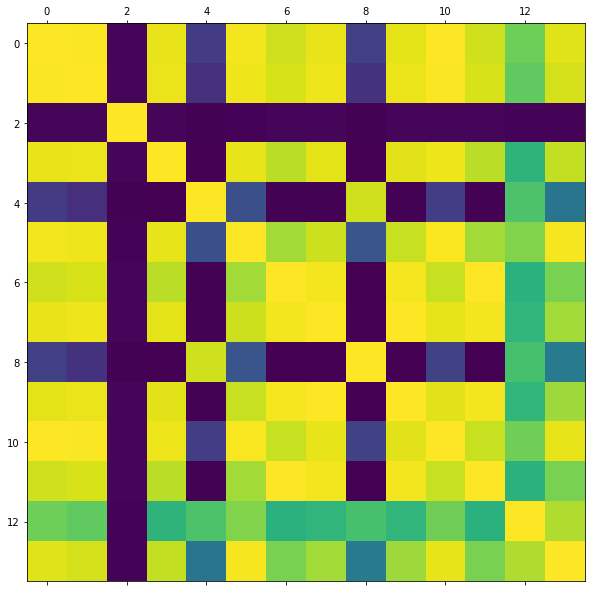

In [107]:
fig = plt.figure(figsize=(10,10))
plt.matshow(train_trans[cols].corr(), fignum=1)

In [108]:
train_trans[cols].corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


In [11]:
train_trans[cols].describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


In [34]:
pca = PCA(n_components=2)
pca.fit(train_trans[cols].values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
tX = pca.transform(train_trans[cols].values)

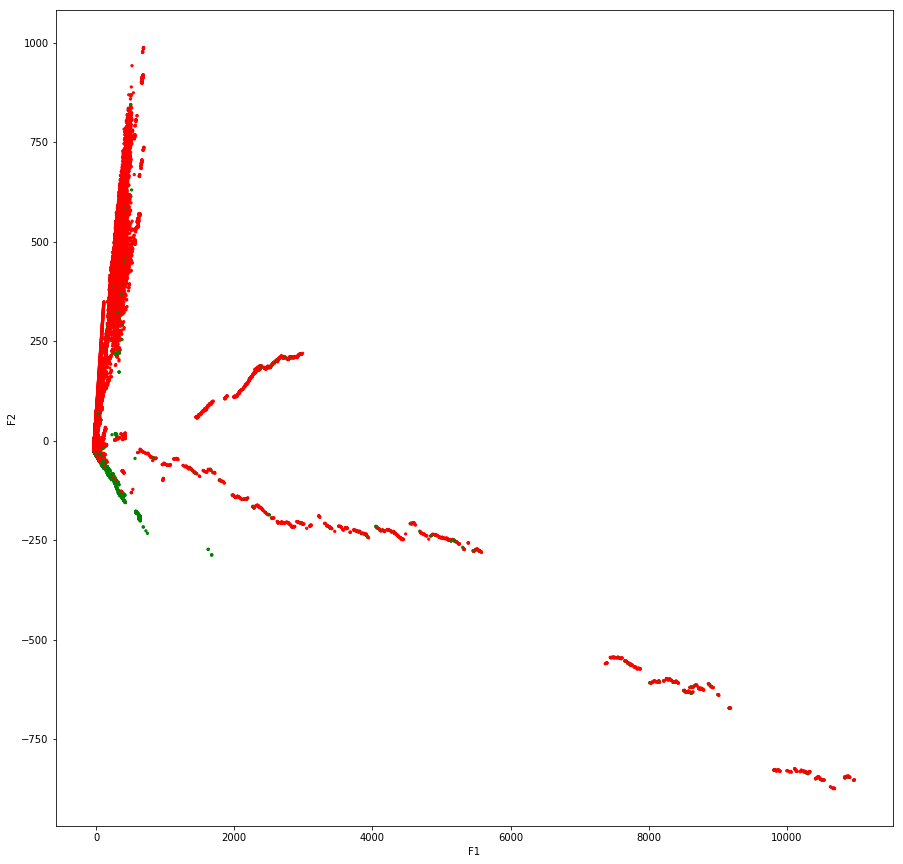

In [46]:
clrs = ['red', 'green']
c = train_trans.isFraud.map(lambda x: clrs[x]).values
pd.DataFrame(tX, columns=['F1', 'F2']).plot.scatter(x='F1', y='F2', figsize=(15,15), marker='.', c=c)